In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e96dc35615d362d688c62602aa2e37d4


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + " "
city_weather = requests.get(city_url)
city_weather.json()

{'cod': '404', 'message': 'city not found'}

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

576

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50 using for i in 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 Set 3 | molina
Processing Record 26 of Set 3 | hovd
Processing Record 27 of Set 3 | kaitangata
Processing Record 28 of Set 3 | rio grande
Processing Record 29 of Set 3 | jinchang
Processing Record 30 of Set 3 | chifeng
Processing Record 31 of Set 3 | tiksi
Processing Record 32 of Set 3 | cidreira
Processing Record 33 of Set 3 | sao joao da barra
Processing Record 34 of Set 3 | tulum
Processing Record 35 of Set 3 | sao filipe
Processing Record 36 of Set 3 | saldanha
Processing Record 37 of Set 3 | saint george
Processing Record 38 of Set 3 | nicoya
Processing Record 39 of Set 3 | ignacio zaragoza
Processing Record 40 of Set 3 | yeletskiy
City not found. Skipping...
Processing Record 41 of Set 3 | general roca
Processing Record 42 of Set 3 | coulihaut
City not found. Skipping...
Processing Record 43 of Set 3 | muisne
Processing Record 44 of Set 3 | lagoa
Processing Record 45 of Set 3 | nyurba
Processing Record 46 of Set 3 | nanortalik
Processing Record 47 of Set 3 | moulmeingyun
City no

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,49.80,91,100,22.53,NZ,2021-05-30 05:37:00
1,Rikitea,-23.1203,-134.9692,75.90,85,100,26.11,PF,2021-05-30 05:37:00
2,Esperance,-33.8667,121.9000,66.04,52,0,17.38,AU,2021-05-30 05:37:00
3,Sitka,57.0531,-135.3300,53.49,62,90,13.80,US,2021-05-30 05:37:01
4,Mataura,-46.1927,168.8643,49.48,98,100,5.59,NZ,2021-05-30 05:37:01
5,Saskylakh,71.9167,114.0833,41.88,81,40,8.70,RU,2021-05-30 05:37:01
6,Khatanga,71.9667,102.5000,52.36,71,45,8.97,RU,2021-05-30 05:37:01
7,Jaffrey,42.8140,-72.0231,44.38,89,100,8.52,US,2021-05-30 05:37:02
8,Puerto Carreno,6.1890,-67.4859,75.78,88,56,2.95,CO,2021-05-30 05:37:02
9,Busselton,-33.6500,115.3333,57.09,76,76,18.21,AU,2021-05-30 05:37:02


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed",]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-05-30 05:37:00,-46.6000,168.3333,49.80,91,100,22.53
1,Rikitea,PF,2021-05-30 05:37:00,-23.1203,-134.9692,75.90,85,100,26.11
2,Esperance,AU,2021-05-30 05:37:00,-33.8667,121.9000,66.04,52,0,17.38
3,Sitka,US,2021-05-30 05:37:01,57.0531,-135.3300,53.49,62,90,13.80
4,Mataura,NZ,2021-05-30 05:37:01,-46.1927,168.8643,49.48,98,100,5.59


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting. as ndarrays
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

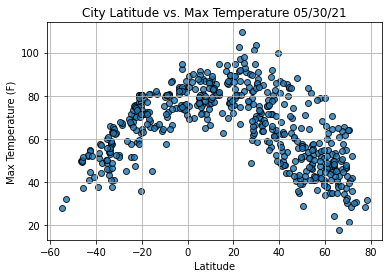

In [32]:
# the following code is to create a scatter plot for the latitude vs. maximum temperature.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

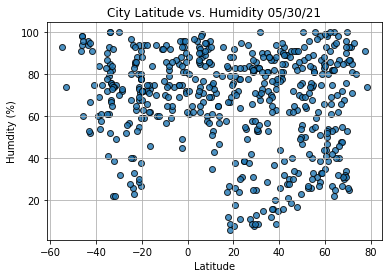

In [33]:
# the following code is to create a scatter plot for the latitude vs. humidity.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

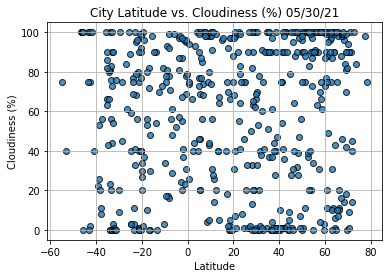

In [34]:
#Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

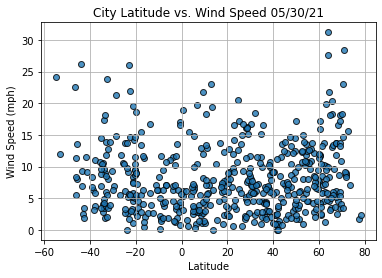

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()